In [2]:
#yahoo finance as data source
#pip install yfinance
import yfinance as yf

In [84]:
#See the yahoo finance ticker for your stock symbol
stock_symbol = 'bnb-usd'

In [85]:
#last 2 years data with interval of 1 day
dataset = yf.download(tickers=stock_symbol,period='max')

[*********************100%***********************]  1 of 1 completed


In [86]:
print(dataset)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-11-09    2.053140    2.174230    1.893940    1.990770    1.990770   
2017-11-10    2.007730    2.069470    1.644780    1.796840    1.796840   
2017-11-11    1.786280    1.917750    1.614290    1.670470    1.670470   
2017-11-12    1.668890    1.672800    1.462560    1.519690    1.519690   
2017-11-13    1.526010    1.735020    1.517600    1.686620    1.686620   
...                ...         ...         ...         ...         ...   
2022-07-11  234.599365  234.649933  225.501419  225.858505  225.858505   
2022-07-12  225.868393  228.190842  220.464554  220.464554  220.464554   
2022-07-13  220.492416  230.538712  216.816803  230.524765  230.524765   
2022-07-14  230.512329  239.660156  227.579910  238.164474  238.164474   
2022-07-15  238.336258  238.336258  235.698715  237.319214  237.319214   

                Volume  
Date        

In [87]:
import pandas as pd
import numpy as np
from datetime import datetime
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import DataFrame
from pandas import concat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential,load_model
from keras.layers import Dense
from keras.layers import LSTM
#Using Tensorflow Backend

In [88]:
values=dataset.values
values

array([[2.05313993e+00, 2.17423010e+00, 1.89393997e+00, 1.99076998e+00,
        1.99076998e+00, 1.91922000e+07],
       [2.00773001e+00, 2.06946993e+00, 1.64478004e+00, 1.79683995e+00,
        1.79683995e+00, 1.11550000e+07],
       [1.78628004e+00, 1.91775000e+00, 1.61429000e+00, 1.67047000e+00,
        1.67047000e+00, 8.17815000e+06],
       ...,
       [2.20492416e+02, 2.30538712e+02, 2.16816803e+02, 2.30524765e+02,
        2.30524765e+02, 1.43177614e+09],
       [2.30512329e+02, 2.39660156e+02, 2.27579910e+02, 2.38164474e+02,
        2.38164474e+02, 1.60936157e+09],
       [2.38336258e+02, 2.38336258e+02, 2.35698715e+02, 2.37319214e+02,
        2.37319214e+02, 1.66095283e+09]])

In [89]:
# ensure all data is float
values = values.astype('float32')

In [90]:
print(values)

[[2.0531399e+00 2.1742301e+00 1.8939400e+00 1.9907700e+00 1.9907700e+00
  1.9192200e+07]
 [2.0077300e+00 2.0694699e+00 1.6447800e+00 1.7968400e+00 1.7968400e+00
  1.1155000e+07]
 [1.7862800e+00 1.9177500e+00 1.6142900e+00 1.6704700e+00 1.6704700e+00
  8.1781500e+06]
 ...
 [2.2049242e+02 2.3053871e+02 2.1681680e+02 2.3052477e+02 2.3052477e+02
  1.4317761e+09]
 [2.3051233e+02 2.3966016e+02 2.2757991e+02 2.3816447e+02 2.3816447e+02
  1.6093615e+09]
 [2.3833626e+02 2.3833626e+02 2.3569872e+02 2.3731921e+02 2.3731921e+02
  1.6609528e+09]]


In [91]:
values[:, 3]

array([  1.99077,   1.79684,   1.67047, ..., 230.52477, 238.16447,
       237.31921], dtype=float32)

In [92]:
# normalize features
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(values)

In [93]:
print(scaled[-5:])

[[0.3454156  0.33809748 0.35388324 0.332775   0.332775   0.05677922]
 [0.33247706 0.32872766 0.3459272  0.32477415 0.32477415 0.06339479]
 [0.32451034 0.3321336  0.34016535 0.33969644 0.33969644 0.07961809]
 [0.33935896 0.34536555 0.35716635 0.3510284  0.3510284  0.0894933 ]
 [0.3509533  0.34344503 0.3699905  0.34977463 0.34977463 0.09236221]]


In [94]:
values = scaled
train_X, test_X, train_y, test_y = train_test_split(values, values[:, 3], test_size=0.2, shuffle=False)
print(train_X.shape, test_X.shape)

(1368, 6) (342, 6)


In [95]:
print(test_X[-5:])

[[0.3454156  0.33809748 0.35388324 0.332775   0.332775   0.05677922]
 [0.33247706 0.32872766 0.3459272  0.32477415 0.32477415 0.06339479]
 [0.32451034 0.3321336  0.34016535 0.33969644 0.33969644 0.07961809]
 [0.33935896 0.34536555 0.35716635 0.3510284  0.3510284  0.0894933 ]
 [0.3509533  0.34344503 0.3699905  0.34977463 0.34977463 0.09236221]]


In [96]:
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

In [97]:
print(train_X.shape)
print(test_X.shape)

(1368, 1, 6)
(342, 1, 6)


In [98]:
from keras.engine import sequential
#Design Network
model=Sequential()
model.add(LSTM(50,input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mse',optimizer='adam',metrics=['mae'])


In [99]:
history = model.fit(train_X, train_y, epochs=100, batch_size=8, validation_data=(test_X, test_y), verbose=2)
model.save("model.h5")

Epoch 1/100
171/171 - 25s - loss: 0.0068 - mae: 0.0359 - val_loss: 5.1177e-04 - val_mae: 0.0203 - 25s/epoch - 146ms/step
Epoch 2/100
171/171 - 0s - loss: 1.2153e-04 - mae: 0.0046 - val_loss: 4.4332e-04 - val_mae: 0.0188 - 482ms/epoch - 3ms/step
Epoch 3/100
171/171 - 0s - loss: 1.0168e-04 - mae: 0.0043 - val_loss: 2.9460e-04 - val_mae: 0.0150 - 473ms/epoch - 3ms/step
Epoch 4/100
171/171 - 1s - loss: 7.4685e-05 - mae: 0.0036 - val_loss: 2.0259e-04 - val_mae: 0.0120 - 506ms/epoch - 3ms/step
Epoch 5/100
171/171 - 0s - loss: 6.1014e-05 - mae: 0.0032 - val_loss: 1.4370e-04 - val_mae: 0.0094 - 481ms/epoch - 3ms/step
Epoch 6/100
171/171 - 1s - loss: 5.2192e-05 - mae: 0.0031 - val_loss: 2.0114e-04 - val_mae: 0.0106 - 547ms/epoch - 3ms/step
Epoch 7/100
171/171 - 1s - loss: 4.3601e-05 - mae: 0.0026 - val_loss: 1.5327e-04 - val_mae: 0.0102 - 509ms/epoch - 3ms/step
Epoch 8/100
171/171 - 1s - loss: 4.5652e-05 - mae: 0.0032 - val_loss: 1.3086e-04 - val_mae: 0.0087 - 565ms/epoch - 3ms/step
Epoch 9/100

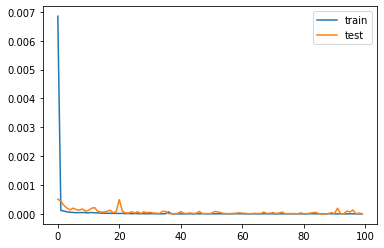

In [100]:
pyplot.plot(history.history['loss'],label='train')
pyplot.plot(history.history['val_loss'],label='test')
pyplot.legend()
pyplot.show()

In [101]:
test_X.shape

(342, 1, 6)

In [108]:
yhat = model.predict(test_X)
test_X=test_X.reshape((test_X.shape[0],test_X.shape[2])) #1

In [109]:
print(yhat.shape)
print(test_y.shape)

(342, 1)
(342,)


In [110]:
print(yhat)

[[0.5074738 ]
 [0.52520156]
 [0.55132717]
 [0.58344704]
 [0.5732863 ]
 [0.60981035]
 [0.60786253]
 [0.61454785]
 [0.6224136 ]
 [0.5997006 ]
 [0.59172463]
 [0.63945174]
 [0.6754311 ]
 [0.667758  ]
 [0.6677366 ]
 [0.7438573 ]
 [0.70035684]
 [0.74758273]
 [0.7129275 ]
 [0.7340116 ]
 [0.7231458 ]
 [0.71521187]
 [0.68342257]
 [0.6911768 ]
 [0.7277172 ]
 [0.72095394]
 [0.7263453 ]
 [0.7418288 ]
 [0.74957377]
 [0.73706084]
 [0.6163287 ]
 [0.6138804 ]
 [0.6275893 ]
 [0.5984782 ]
 [0.6036843 ]
 [0.61875886]
 [0.5918362 ]
 [0.6150029 ]
 [0.64128095]
 [0.630578  ]
 [0.6042595 ]
 [0.61108315]
 [0.60763574]
 [0.5381563 ]
 [0.51245785]
 [0.56211764]
 [0.56868184]
 [0.5256974 ]
 [0.51898116]
 [0.5076839 ]
 [0.50023955]
 [0.49426574]
 [0.5456065 ]
 [0.574255  ]
 [0.62554866]
 [0.63631856]
 [0.6402325 ]
 [0.63129014]
 [0.6580436 ]
 [0.64495194]
 [0.6524268 ]
 [0.6232487 ]
 [0.626965  ]
 [0.6020862 ]
 [0.61524427]
 [0.65671575]
 [0.6978315 ]
 [0.7021198 ]
 [0.7023203 ]
 [0.69353944]
 [0.6989542 ]
 [0.72

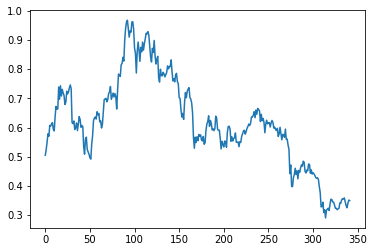

In [111]:
pyplot.plot(test_y)

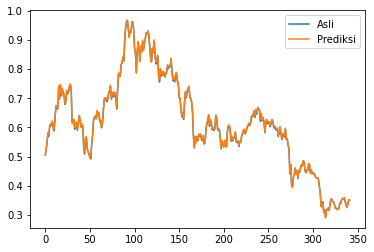

In [112]:
pyplot.plot(test_y,label="Asli")
pyplot.plot(yhat,label="Prediksi") 
pyplot.legend(loc="best")

In [113]:
#invert scaling for predict
inv_yhat=concatenate((yhat,test_X[:,1:]),axis=1)
print(inv_yhat)
inv_yhat=scaler.inverse_transform(inv_yhat)
inv_yhat=inv_yhat[:,0]
print("Harga Prediksi")
print(inv_yhat)

[[0.5074738  0.5195566  0.53040135 0.5051434  0.5051434  0.08603293]
 [0.52520156 0.5161631  0.5247445  0.524281   0.524281   0.09166542]
 [0.55132717 0.54274416 0.5494518  0.5494786  0.5494786  0.11958373]
 ...
 [0.3376233  0.3321336  0.34016535 0.33969644 0.33969644 0.07961809]
 [0.34969756 0.34536555 0.35716635 0.3510284  0.3510284  0.0894933 ]
 [0.34903014 0.34344503 0.3699905  0.34977463 0.34977463 0.09236221]]
Harga Prediksi
[343.957   355.91977 373.54944 395.2241  388.36755 413.01416 411.69977
 416.21106 421.51886 406.19208 400.80984 433.0163  457.29532 452.1175
 452.10306 503.46967 474.11536 505.98358 482.59808 496.8257  489.49344
 484.1396  462.68802 467.9206  492.57825 488.01437 491.65247 502.1008
 507.32715 498.88336 417.41278 415.76065 425.01147 405.36716 408.88028
 419.05264 400.88513 416.5181  434.25067 427.02826 409.2684  413.87305
 411.54672 364.66165 347.32025 380.8309  385.26044 356.25436 351.7222
 344.09875 339.0753  335.04413 369.68912 389.02124 423.63443 430.902
 4

In [114]:
#invert scaling for actual
test_y=test_y.reshape((len(test_y),1))
inv_y=concatenate((test_y,test_X[:,1:]),axis=1)
inv_y=scaler.inverse_transform(inv_y)
inv_y=inv_y[:,0]

In [115]:
mape=np.mean(np.abs((inv_y-inv_yhat)/inv_y))**100
mape

7.535935507004314e-235

In [116]:
print("PRICEE DATA AKTUAL : ")
print(inv_y)

PRICEE DATA AKTUAL : 
[342.38443 355.29858 372.302   392.1232  386.1796  411.329   409.41684
 414.98257 417.86108 402.28455 398.62372 431.39172 455.3616  449.3399
 449.4733  500.35794 472.03635 503.2563  479.4539  494.96097 486.65146
 480.73203 459.9203  464.8529  490.5269  484.37347 489.0615  498.54407
 505.09164 496.38864 417.89905 415.5012  421.6638  401.99716 405.90643
 417.07272 399.43643 414.6234  431.82632 425.04617 407.0129  411.1933
 408.85345 362.3042  344.8566  379.79498 384.17914 355.64835 350.20706
 344.50342 336.5054  333.3438  368.33353 387.4191  422.03732 428.4985
 430.91122 426.14688 443.12    435.80835 439.17188 419.4938  421.94348
 405.44794 413.84268 444.28247 471.1898  472.46368 474.14548 466.07776
 471.06552 485.56454 488.60522 501.4887  471.69748 479.0906  486.3607
 477.0787  485.09814 478.47192 449.4277  492.47552 530.1173  528.4148
 524.85474 551.7713  554.96606 569.1104  560.2606  609.21716 636.70874
 651.06226 654.9268  635.78455 615.8534  630.4813  627.22845

In [117]:
# TAMBAHAN
inputpred=values[-1,:]
print(inputpred.shape)
print(values.shape)
#
inputpred= inputpred.reshape((1,1,inputpred.shape[0]))
prediksinya=model.predict(inputpred)
print(prediksinya)

(6,)
(1710, 6)
[[0.34903014]]


In [ ]:
prediksinya=concatenate((prediksinya[0],test_X[0,1:]))
print(prediksinya.reshape(1,-1))
prediksinya=scaler.inverse_transform(prediksinya.reshape(1,-1))
prediksinya=prediksinya[:,0]
print("Harga Prediksi")
print(prediksinya)

In [120]:
yhat_train = model.predict(train_X)

In [122]:
trainScore = np.sqrt(mean_squared_error(train_y, yhat_train))
print('Train Score: %.10f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(test_y, yhat))
print('Test Score: %.10f RMSE' % (testScore))

Train Score: 0.0011075271 RMSE
Test Score: 0.0031498971 RMSE
